# 2.8 Statistical Considerations for geoscientific Data and Noise

Statistical properties of geoscientific data

## 1. Statistical Features

::warning:: this might be replaced with slides.

s
Let be $P(z)$ the distribution of the data $z$.

### The mean

![mean](../img/mean.png)

Image taken from this [blog](!https://gregorygundersen.com/blog/2020/04/11/moments).

The mean is the sum of the values divided by the number of data points. It is the first raw moment of a distribution. 
$\mu = \int_{-\infty}^\infty zP(z)dz$, where z is the ground motion value (bin) and $P(z)$ is the distribution of the data.

### The Variance

![variance](../img/variance.png)

The variance is the second *centralized* moment. *Centralized* means that the distribution is shifted around the mean. It calculates how spread out is a distribution.

$\sigma^2 = \int_{-\infty}^\infty (z-\mu)^2P(z)dz$

The standard deviation is the square root of the variance, $\sigma$. A high variance indicates a wide distribution.

### The skewness

Skewness is the third *standardized* moment. The *standardized* moment is scaled by the standard deviation. It measures the relative size of the two tails of the distribution.


$m_3= \int_{-\infty}^\infty \frac{(z - \mu)^3}{\sigma^3}P(z)dz$

With the cubic exponent, it is possible that the skewness is negative.

![skewness](../img/skewness.png)

Image taken from this [blog](!https://gregorygundersen.com/blog/2020/04/11/moments).

A positively skewed distribution is one where most of the weight is at the end of the distribution. A negatively skewed distribution is one where most of the weight is at the beginning of the distribution.


### Kurtosis

Kurtosis measures the combined size of the two tails relative to the whole distribution. It is the fourth centralized and standardized moment.

$m_4= \int_{-\infty}^\infty (\frac{z-\mu}{\sigma})^4P(z)dz$

 ![kurtosis](../img/kurtosis.png)
The laplace, normal, and uniform distributions have a mean of 0 and a variance of 1. But their kurtosis is 3, 0, and -1.2.


Python functions to calculate the moments might be:

In [194]:
# Import modules for seismic data and feature extraction
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as st
import scipy.signal as sig

In [195]:
def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    return raw_moment(X=X, k=k, c=X.mean())

## 2. Geological data sets [Level 1]

We will explore the composition of Granite in terms of Silicate and Magnesium content. The data was collected from XXX.

In [196]:
# Load .csv data into a pandas dataframe
df = pd.read_csv('EarthRocGranites.csv')

Data pre-processing is often necessary, and most importantly, it is critical to record any processing step to raw data. Do not change the original data file, instead record processing steps. Below, we drop the rows with NaNs (not a number).

In [197]:
df = df.dropna()    # remove rows with NaN values
df.head()   # describe the data

,SIO2(WT%),MGO(WT%)
0,72.57,0.49
1,70.39,0.84
2,71.60,0.59
3,68.93,0.81
4,71.07,0.76


Pandas python software includes methods to report basics data statistics. Use the function ``describe`` to the Pandas data frame.

In [198]:
df.describe()

,SIO2(WT%),MGO(WT%)
count,15924.000000,15924.000000
mean,72.113026,0.613687
std,4.103932,0.942135
min,8.710000,0.000000
25%,70.100000,0.170000
50%,72.750000,0.390000
75%,74.890000,0.780000
max,93.010000,57.000000


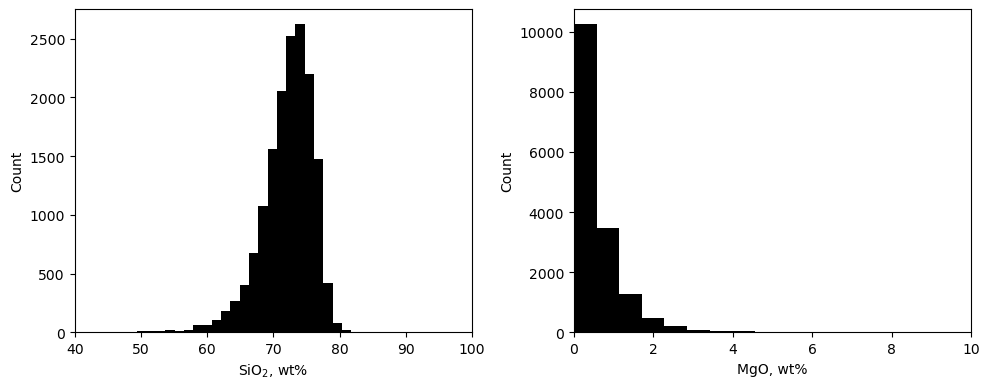

In [199]:
# Now, let's visualize the histograms of silica and magnesium

# Create a subplot with two histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot the histograms for each column
axes[0].hist(df['SIO2(WT%)'], bins=60, color='black')
axes[0].set_xlabel('SiO$_2$, wt%')
axes[0].set_ylabel('Count')
axes[0].set_xlim([40, 100])

axes[1].hist(df['MGO(WT%)'], bins=100, color='black')
axes[1].set_xlabel('MgO, wt%')
axes[1].set_ylabel('Count')
# Note these xlims -> the data largely [but not completely!] sit between 0 and 10 wt%
axes[1].set_xlim([0, 10])

# Add spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

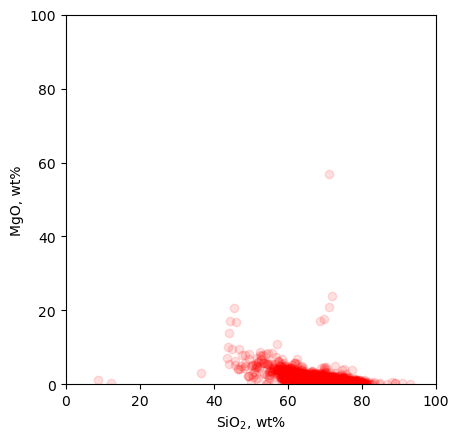

In [200]:
# One more plot: let's look at a scatter of SiO2 vs. MgO
plt.scatter(df['SIO2(WT%)'], df['MGO(WT%)'], c='red', alpha=0.125)
ax = plt.gca()
ax.set_xlim([0,100])
ax.set_xlabel('SiO$_2$, wt%')
ax.set_ylim([0,100])
ax.set_ylabel('MgO, wt%')
ax.set_aspect('equal')

Now, let's generate *moments* for SiO$_2$



In [201]:
# Let us first define the moment functions

def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    return raw_moment(X=X, k=k, c=X.mean())

# The mean:
print(f'The mean is: {raw_moment(df["SIO2(WT%)"], 1):4.2f}')

# Variance:
print(f'The variance is: {central_moment(df["SIO2(WT%)"], 2):4.2f}')

# Skewness:
skewness = central_moment(df["SIO2(WT%)"], 3) / central_moment(df["SIO2(WT%)"], 2) ** (3/2)
print(f'The skewness is: {skewness:4.2f}')

# Kurtosis
kurtosis_value = central_moment(df['SIO2(WT%)'], 4) / central_moment(df['SIO2(WT%)'], 2) ** 2
print(f'The kurtosis is: {kurtosis_value:4.2f}')

The mean is: 72.11
The variance is: 16.84
The skewness is: -1.75
The kurtosis is: 13.67


In [202]:
# We can also just use pandas (or numpy or scipy):

print('The mean is: %4.2f, the variance is: %4.2f, the skewness is: %4.2f, and the kurtosis is: %4.2f' % (df['SIO2(WT%)'].mean(), df['SIO2(WT%)'].var(), df['SIO2(WT%)'].skew(), df['SIO2(WT%)'].kurtosis()))


The mean is: 72.11, the variance is: 16.84, the skewness is: -1.75, and the kurtosis is: 10.67


## 3. Synthetic Data and Noise Time series [Level 1]


Here we will construct a time series with 1 ricker wavelet as a source and synthetic noise

We will analyze their statistical properties and compare the distributions. Present this as a binary classification problem.

In [203]:
fs = 100. # sampling rate
twin = 50. # window length
t = np.linspace(0,twin,int(twin*fs)) #points = 100

#### Event Signal

We will create an event signal as a Ricker wavelet of specified width, 4 seconds in time.

Text(0.5, 0, 'Time in s')

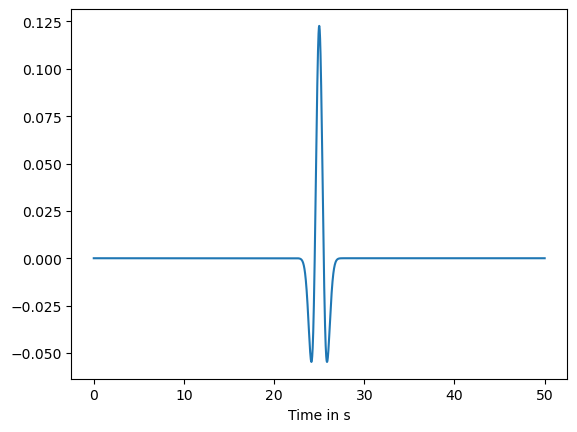

In [204]:
a = 50 # proportional to the width of the wavelet, about a factor of 10
sa = sig.ricker(int(a*fs), a)
# plate the signal in the middle of the time series
s = np.concatenate((np.zeros(len(t)//2-len(sa)//2),sa,np.zeros(len(t)//2-len(sa)//2)))

# plot the signal
plt.plot(t,s)
plt.xlabel('Time in s')


The Ricker wavelet is a smooth function with a signal in a specific frequency band. Let's plot it's absolute Fourier amplitude spectrum.

In [205]:
from scipy.fftpack import fft, fftfreq, next_fast_len

## FFT the signals
# fill up until 2^N value to speed up the FFT
Nfft = next_fast_len(len(s)) # this will be an even number

freqVec = fftfreq(Nfft, d=1/fs)[:Nfft//2]
Zhat = fft(s,n=Nfft)

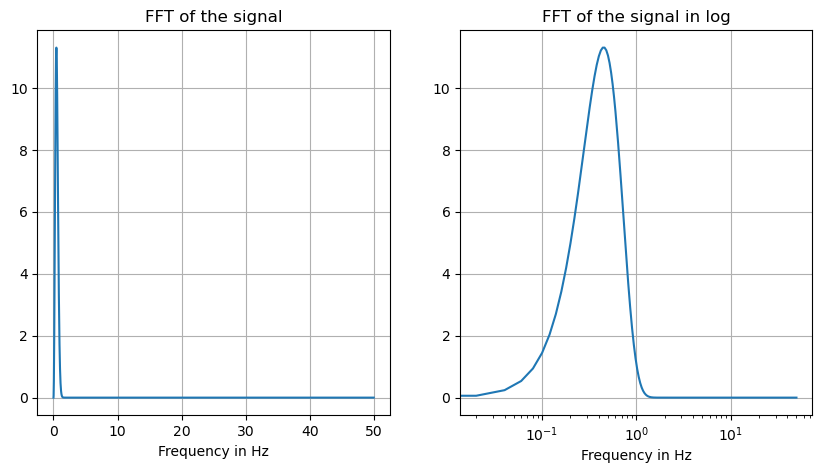

In [206]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(freqVec, np.abs(Zhat[:Nfft//2]))
ax[0].grid()
ax[0].set_title('FFT of the signal')
ax[0].set_xlabel('Frequency in Hz')
ax[1].plot(freqVec, np.abs(Zhat[:Nfft//2]))
ax[1].set_xscale('log')
ax[1].set_xlabel('Frequency in Hz')
ax[1].set_title('FFT of the signal in log')
ax[1].grid()

What does the event data distribution looks like?

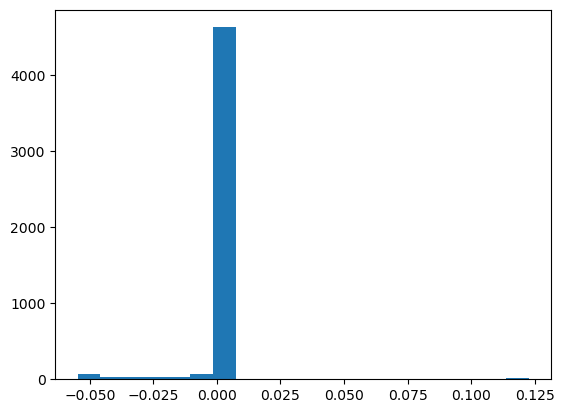

In [207]:
plt.hist(sa,bins=20);

We created a pure signal not contaminated by noise. Let's create a *noise* time series to add on the *signal* time series.

Synthetic noise may take several form.

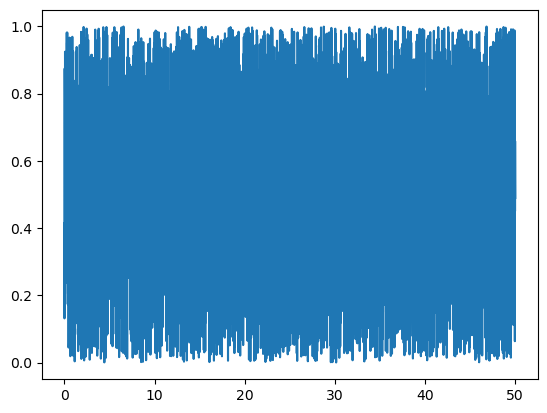

In [208]:
noise = np.random.rand(len(s))
plt.plot(t,noise)

Check the Fourier amplitude spectrum of the noise

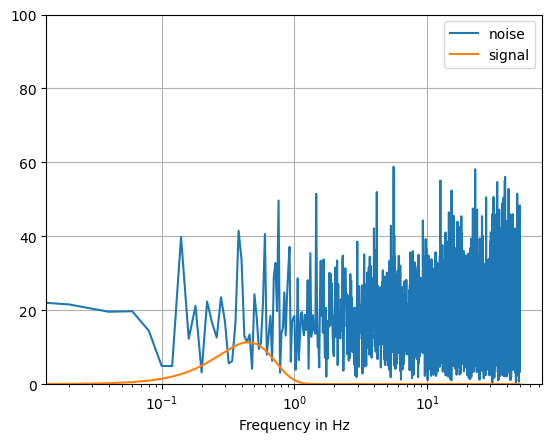

In [209]:
nhat = fft(noise,n=Nfft)
plt.plot(freqVec, np.abs(nhat[:Nfft//2]))
plt.plot(freqVec, np.abs(Zhat[:Nfft//2]))
plt.xscale('log')
plt.legend(['noise','signal'])
plt.xlabel('Frequency in Hz')
plt.ylim([0,100])   
plt.grid()

OK, they look very different in the spectral domain!
Let's add noise to the data and plot it.

We will tune a signal to noise ratio to multiply the noise level relative to the signal level. We define this as the max absolute amplitude of the signal, divided by the max absolute amplitude of the noise

In [210]:
SNR = 100 # signal to noise ratio

Now normalize both noise and signal amplitudes.

In [211]:
s /= np.max(np.abs(s)) # normalize the signal
noise /= np.max(np.abs(noise)) # normalize the noise    

Text(0.5, 0, 'Time in s')

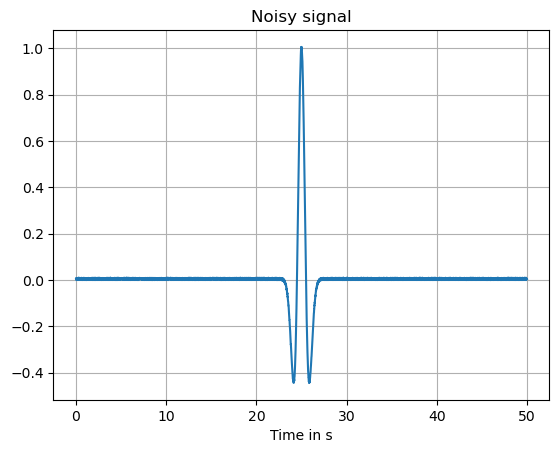

In [212]:
noisy_signal = s + noise/SNR
plt.plot(t,noisy_signal)
plt.grid()
plt.title('Noisy signal')
plt.xlabel('Time in s')

Noise may have different frequency content, or *color*. We can construct a time series of noise based on its Fourier amplitude spectrum.

In [213]:
from scipy.fftpack import ifft
# random phase
NN = 2*np.pi*np.random.uniform(-1,1,Nfft//2)-np.pi
newnoiseF=np.zeros(Nfft,dtype=np.complex_)
for i in range(Nfft//2):
    newnoiseF[i] = np.exp(1j*NN[i])
    newnoiseF[-i] = np.conj(newnoiseF[i])
newnoiseF[0] = 0
noise = ifft(newnoiseF).real

In [214]:
noise

array([-0.02938002,  0.0313548 ,  0.01182476, ...,  0.01588404,
       -0.01880449,  0.00017777])

Text(0.5, 1.0, 'Noise with random phase and white spectrum')

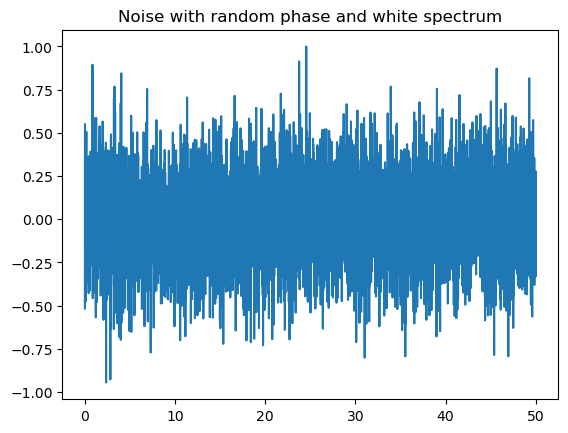

In [215]:
noise/=np.max(np.abs(noise)) # normalize the noise  
plt.plot(t,noise)
plt.title('Noise with random phase and white spectrum')

Add the new noise and the signal (Ricker wavelet) and plot them in time and frequency domain

In [216]:
SNR=1

In [217]:
news = s+noise/SNR

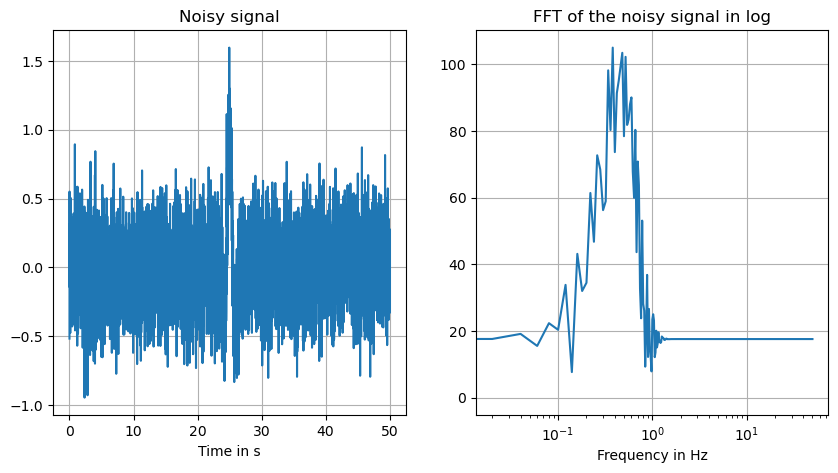

In [218]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(t,news)
ax[0].set_title('Noisy signal')
ax[0].set_xlabel('Time in s')
ax[0].grid()
ax[1].plot(freqVec, np.abs(fft(news,n=Nfft)[:Nfft//2]))
ax[1].set_xscale('log')
ax[1].grid()
ax[1].set_xlabel('Frequency in Hz')
ax[1].set_title('FFT of the noisy signal in log');

Let's compare the data distribution between the pure signal, the noise signal, and the combined signals.

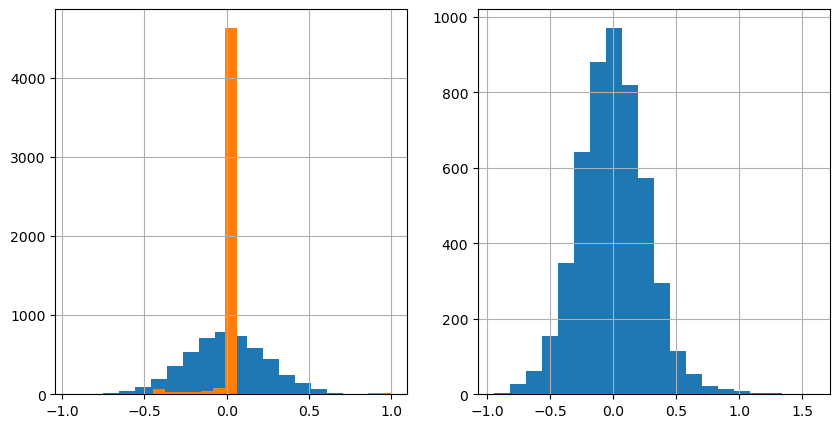

In [219]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(noise,bins=20);ax[0].grid()
ax[0].hist(s,bins=20);
ax[1].hist(news,bins=20);ax[1].grid();

Now in class, calculate the statistical moments between the clean data, the noise, and the noisy data. Explore what features might be discriminate between **signal** and **noise** and explore their sensitivity to noise levels.


We can now calculate the mean, variance, skewness, and kurtosis of the data:


In [220]:
# enter answers here using the functions for the moment.
# the mean:
print(raw_moment(news,1))

# the variance:
print(central_moment(news,2))

# the skewness
print(central_moment(news,3)/central_moment(news,2)**(3/2))

# the kurtosis
print(central_moment(news,4)/central_moment(news,2)**2)



1.7763568394002505e-18
0.07508417348193797
0.2970118992746436
4.060298649528828


We can also use the numpy and scipy modules to get these values

In [221]:
print('the mean is %4.2f, the variance is %4.2f, the skewness is %4.2f, the kurtosis is %4.2f'
 %(np.mean(news),np.std(news)**2,scipy.stats.skew(news),scipy.stats.kurtosis(news,fisher=False)))

the mean is 0.00, the variance is 0.08, the skewness is 0.30, the kurtosis is 4.06


## 4. Realistic or physics-informed synthetic Data and Noise [Level 2]

In this case, we can create a time series that has the similar noise structure than the realistic noise.

These values may mean nothing without some additional context. We can download seismic noise data to see if the earthquake waveforms are statistically different from the noise. For that, we will download the same length of data prior to the earthquake:

In [222]:
!pip install obspy
import obspy
import obspy.clients.fdsn.client as fdsn
from obspy import UTCDateTime 


In [223]:
# Download seismic data
network = 'UW'
station = 'RATT'
channel = 'HHZ'# this channel gives a low frequency, 1Hz signal.
Tstart = UTCDateTime(2021,7,29,6,15)
fdsn_client = fdsn.Client('IRIS') # client to query the IRIS DMC server
# call to download the specific data: noise waveforms
N = fdsn_client.get_waveforms(network=network, station=station, location='--', channel=channel, starttime=Tstart-7200, \
    endtime=Tstart, attach_response=True)
N.merge(); N.detrend(type='linear');N[0].taper(max_percentage=0.05)

UW.RATT..HHZ | 2021-07-29T04:15:00.000000Z - 2021-07-29T06:14:59.990000Z | 100.0 Hz, 720000 samples

From the Fourier domain, use ``np.rand[n]`` functions to create a random *phase spectrum* between -$\pi$ and $\pi$. For the *amplitude spectrum*, you may choose a *white* color, which means that the amplitude spectrum is flat and equal at all frequencies; you may choose a *color* for the spectrum, for instance an amplitude that decays with $1/f$; you may choose the spectrum of the realistic noise, for instance extracted from raw data.


### 2.1 Random noise

Below, use the random function to create a synthetic noise. 
1. Create an array of random numbers between -1 and 1 of length the same length as the data Z.
2. Calculate the signal-to-noise ratio, for instance: 

$ SNR = 20 log_{10} (\frac{\max(|signal|)}{\max(|noise|)})$

or simply

$SNR = (\frac{\max(|signal|)}{\max(|noise|)})$

3. Add the synthetic noise with a varying SNR

In [224]:
# 1. Create a time series of the synthetic noise
import numpy.random as random

new_noise= random.randn(len(t))

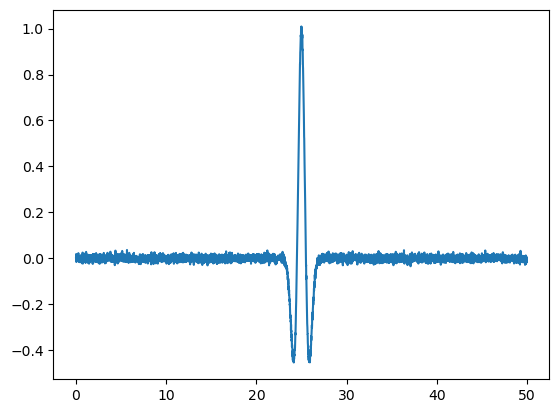

In [225]:
SNR=100.
plt.plot(t,s/np.max(np.abs(s)) +new_noise/SNR);

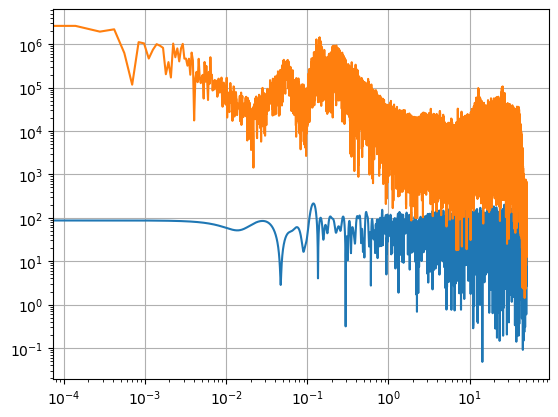

In [226]:
# Make noise based on the spectrum of the noise data
npts = N[0].stats.npts-1
## FFT the signals
# fill up until 2^N value to speed up the FFT
Nfft = next_fast_len(int(N[0].data.shape[0]-1)) # this will be an even number
freqVec = fftfreq(Nfft, d=N[0].stats.delta)[:Nfft//2]
Nat = fft(new_noise,n=Nfft)#/np.sqrt(Z[0].stats.npts)


plt.plot(freqVec,np.abs(Nat[:Nfft//2]))

N.taper(max_percentage=0.05)
Nhat = fft(N[0].data,n=Nfft)#/np.sqrt(Z[0].stats.npts)

plt.plot(freqVec,np.abs(Nhat[:Nfft//2]))
plt.xscale('log');plt.yscale('log');plt.grid()


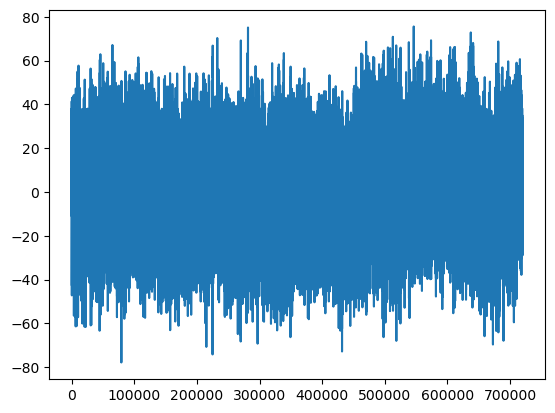

In [229]:
from scipy.fftpack import ifft
Nhat = fft(N[0].data,n=Nfft)#/np.sqrt(Z[0].stats.npts)
NN = 2*np.pi*random.uniform(-1,1,Nfft//2)-np.pi
newcrap=np.zeros(Nfft,dtype=np.complex_)

for i in range(Nfft//2):
    newcrap[i] = np.abs(Nhat[i])*np.exp(1j*NN[i])
    newcrap[-i] = np.conj(NN[i])
newnoiseF[0] = 0
crap = ifft(newcrap).real
plt.plot(crap)

(array([36065., 35986., 35800., 35856., 36177., 35963., 36050., 36063.,
        35866., 36174.]),
 array([-9.42476644, -8.16813116, -6.91149589, -5.65486061, -4.39822533,
        -3.14159005, -1.88495477, -0.62831949,  0.62831579,  1.88495106,
         3.14158634]),
 <BarContainer object of 10 artists>)

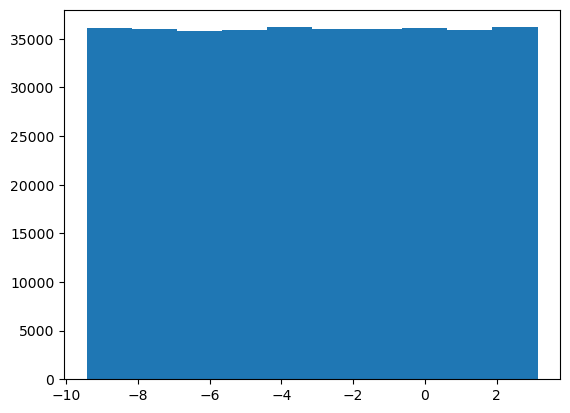

In [230]:
NN = 2*np.pi*random.uniform(-1,1,Nfft//2)-np.pi
plt.hist(NN)